In [1]:
import compute_ADC
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
raw_DWI = nib.load('datasets/The_Dallas_Lifespan_Brain_Study/ds004856-1.2.0/sub-12/ses-wave1/dwi/sub-12_ses-wave1_acq-DTI_run-1_dwi.nii.gz')
print(raw_DWI.shape)

(128, 128, 50, 31)


In [ ]:
# Get every DWI file in the dallas lifespan brain study dataset and compute the ADC
# for each file. Save the ADC as a nifti file in the datasets/Dallas_Computed_ADC directory

""" for subject in os.listdir('datasets/The_Dallas_Lifespan_Brain_Study/ds004856-1.2.0/'):
    for session in os.listdir('datasets/The_Dallas_Lifespan_Brain_Study/ds004856-1.2.0/' + subject):
            
            file_name = 'datasets/The_Dallas_Lifespan_Brain_Study/ds004856-1.2.0/' + subject + '/' + session + '/dwi/' + f"{subject}_{session}_acq-DTI_run-1_dwi.nii.gz"
            raw_DWI = nib.load(file_name)

            #reads the first line of the bval file to see if b0 is a the first place or last place
            with open('datasets/The_Dallas_Lifespan_Brain_Study/ds004856-1.2.0/' + subject + '/' + session + '/dwi/' + f"{subject}_{session}_acq-DTI_run-1_dwi.bval", 'r') as file:
                first_line = file.readline().strip()
                split_line = first_line.split()
                #print(split_line)

            if split_line[0] == '0':
                ADC = compute_ADC.compute_adc_multi_bvec(raw_DWI.get_fdata()[:,:,:,0], raw_DWI.get_fdata()[:,:,:,1:], 1000)
            else:
                ADC = compute_ADC.compute_adc_multi_bvec(raw_DWI.get_fdata()[:,:,:,-1], raw_DWI.get_fdata()[:,:,:,:-1], 1000)
            
            ADC = np.clip(ADC, 0, 0.0040)*1e6

            adc_nifti = nib.Nifti1Image(ADC, raw_DWI.affine)
            output_path = f'datasets/Dallas_Computed_ADC/{subject}_{session}_ADC.nii.gz'      # sortir de ce if
            nib.save(adc_nifti, output_path)
            
            
            
            #print(raw_DWI.shape) """

!!!! Parfois le B0 est à la première place et parfois à la dernière place !!!!

In [3]:
#reads the first line of the bval file to see if b0 is a the first place or last place
with open('datasets/The_Dallas_Lifespan_Brain_Study/ds004856-1.2.0/sub-12/ses-wave1/dwi/sub-12_ses-wave1_acq-DTI_run-1_dwi.bval', 'r') as file:
    first_line = file.readline().strip()
    split_line = first_line.split()
    print(split_line)

['0', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000']


In [4]:
print(np.min(np.unique(raw_DWI.get_fdata())))

0.0


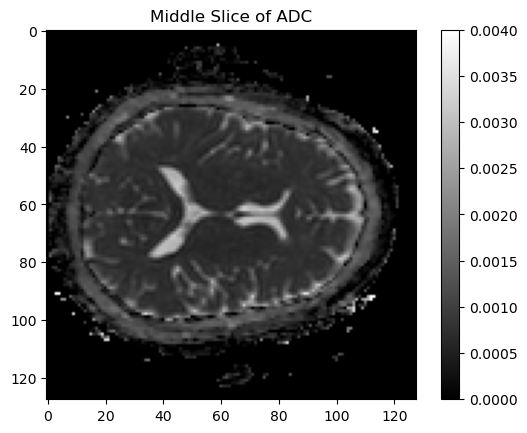

In [5]:
ADC = compute_ADC.compute_adc_multi_bvec(raw_DWI.get_fdata()[:,:,:,0], raw_DWI.get_fdata()[:,:,:,1:], 1000)
plt.imshow(ADC[:, :, ADC.shape[2] // 2], cmap='gray', vmin=0, vmax=0.004)
plt.colorbar()
plt.title('Middle Slice of ADC')
plt.show()

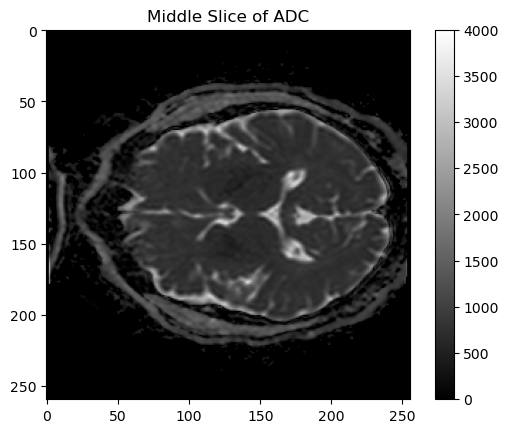

In [6]:
ADC_Aini_stroke = nib.load("datasets/ADC/AIT/aini-stroke-22016_562959_ADC_DIFF_TRA_ADC.nii.gz").get_fdata()
plt.imshow(ADC_Aini_stroke[:, :, ADC_Aini_stroke.shape[2] // 2], cmap='gray', vmin=0, vmax=4000)
plt.colorbar()
plt.title('Middle Slice of ADC')
plt.show()

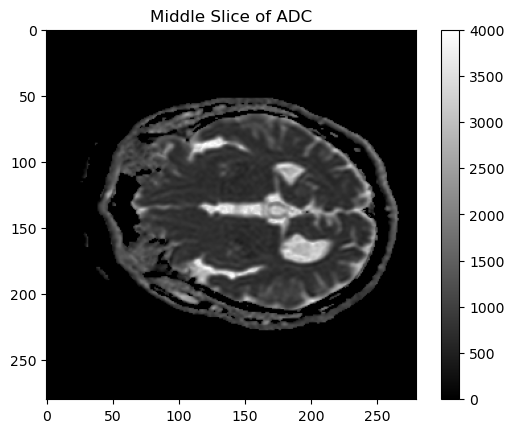

In [7]:
ADC_Aini_stroke = nib.load("datasets/ADC/AIT/aini-stroke-22019_562996_ADC_DIFF_EPI_3_NEX_ADC.nii.gz").get_fdata()
plt.imshow(ADC_Aini_stroke[:, :, ADC_Aini_stroke.shape[2] // 2], cmap='gray', vmin=0, vmax=4000)
plt.colorbar()
plt.title('Middle Slice of ADC')
plt.show()

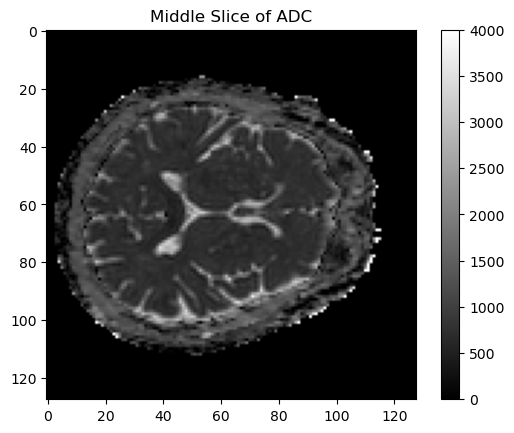

In [16]:
ADC_dallas_computed = nib.load("datasets/Dallas_Computed_ADC/sub-149_ses-wave3_ADC.nii.gz").get_fdata()
plt.imshow(ADC_dallas_computed[:, :, ADC_dallas_computed.shape[2] // 2], cmap='gray')
plt.colorbar()
plt.title('Middle Slice of ADC')
plt.show()